# Term2 深層学習スクラッチ　ニューラルネットワーク



In [106]:
#基本ライブラリ
import time
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#scikit-learnライブラリ
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

#データセット
#from sklearn.datasets import load_iris

## MNISTデータセット

In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 10s 1us/step


### データセットの確認

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train[0].dtype)
print(X_train[0].shape)
print(X_train[0])
print(y_train[0])

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
uint8
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]

### 平滑化

(1, 28, 28)の各画像を、(1, 784)に変換する。これまで学んできた機械学習手法や、今回扱う全結合層のみのニューラルネットワークではこの形で扱う。全てのピクセルが一列になっていることを、 平滑化（flatten） してあるという風に表現する

In [8]:
X_train_f = X_train.reshape(-1, 784)
X_test_f = X_test.reshape(-1, 784)

In [9]:
print(X_train_f.shape)
print(X_test_f.shape)
print(X_train_f[0].dtype)
print(X_train_f[0].shape)
print(X_train_f[0])


(60000, 784)
(10000, 784)
uint8
(784,)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253

In [10]:
print(X_train[0].sum())
print(X_train_f[0].sum())

27525
27525


### 画像データの可視化

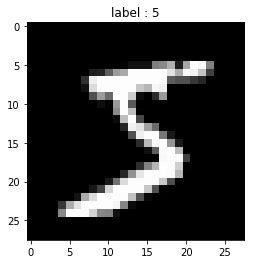

In [11]:
index = 0
image = X_train_f[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

### 前処理

画像は0から255のuint8型（unsigned int）で表されるが、機械学習をする上では0から1のfloat型で扱うことになる。

In [12]:
X_train_ff = X_train_f.astype(np.float)
X_test_ff = X_test_f.astype(np.float)
X_train_ff /= 255
X_test_ff /= 255
print(X_train_ff.max()) # 1.0
print(X_train_ff.min()) # 0.0
print(X_train_ff.shape)
print(X_train_ff[0].shape)
print(X_train_ff[0].dtype)
print(X_train_ff[0]) # 0.0

1.0
0.0
(60000, 784)
(784,)
float64
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.      

また、正解ラベルは0から9の整数ですが、ニューラルネットワークで多クラス分類を行う際には one-hot表現 に変換します。scikit-learnのOneHotEncoderを使用したコードが以下です。このone-hot表現による値はそのラベルである確率を示していることになるため、float型で扱います。

In [13]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64
print(y_train_one_hot[0])

(60000,)
(60000, 10)
float64
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [99]:
# 訓練用データと検証用データの分割

Xt_train, Xt_val, yt_train, yt_val = train_test_split(X_train_ff, y_train_one_hot, test_size=0.2)
print(Xt_train.shape) # (48000, 784)
print(Xt_val.shape) # (12000, 784)
print(yt_train.shape)
print(yt_val.shape)

(48000, 784)
(12000, 784)
(48000, 10)
(12000, 10)


## スクラッチ

多クラス分類を行う3層のニューラルネットワークを作成する。層の数などは固定した上でニューラルネットワークの基本を学ぶ。

In [131]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練用データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [17]:
#GetMiniBatchの挙動確認

batchX = np.arange(200).reshape(100,2)
batchy = np.arange(100)

get_mini_batch = GetMiniBatch(batchX, batchy, batch_size=20)

print(len(get_mini_batch))
print(get_mini_batch[5])
for mini_X_train, mini_y_train in get_mini_batch:
    print(mini_X_train)
    print(mini_y_train)
    print("----")
    

5
(array([], shape=(0, 2), dtype=int64), array([], dtype=int64))
[[ 52  53]
 [172 173]
 [  4   5]
 [110 111]
 [150 151]
 [186 187]
 [ 32  33]
 [146 147]
 [108 109]
 [190 191]
 [106 107]
 [184 185]
 [156 157]
 [ 26  27]
 [ 14  15]
 [ 60  61]
 [ 44  45]
 [ 48  49]
 [ 66  67]
 [ 16  17]]
[26 86  2 55 75 93 16 73 54 95 53 92 78 13  7 30 22 24 33  8]
----
[[ 86  87]
 [124 125]
 [  6   7]
 [142 143]
 [ 90  91]
 [ 96  97]
 [ 12  13]
 [198 199]
 [164 165]
 [152 153]
 [120 121]
 [160 161]
 [180 181]
 [136 137]
 [102 103]
 [ 54  55]
 [ 36  37]
 [112 113]
 [126 127]
 [148 149]]
[43 62  3 71 45 48  6 99 82 76 60 80 90 68 51 27 18 56 63 74]
----
[[  2   3]
 [122 123]
 [ 84  85]
 [ 82  83]
 [  8   9]
 [ 30  31]
 [ 34  35]
 [ 80  81]
 [ 76  77]
 [ 10  11]
 [182 183]
 [118 119]
 [  0   1]
 [ 68  69]
 [ 56  57]
 [100 101]
 [ 22  23]
 [ 70  71]
 [ 46  47]
 [104 105]]
[ 1 61 42 41  4 15 17 40 38  5 91 59  0 34 28 50 11 35 23 52]
----
[[ 20  21]
 [ 62  63]
 [132 133]
 [114 115]
 [158 159]
 [170 171]
 [ 64

## 【問題1】重みの初期値を決めるコードの作成

ニューラルネットワークの各層の重みの初期値を決めるコードを作成する。

今回はガウス分布による単純な初期化を行う。バイアスに関しても同様。

In [100]:
#重み
n_features = 784
n_nodes1 = 400
sigma = 0.01 # ガウス分布の標準偏差
W1 = sigma * np.random.randn(n_features, n_nodes1) #（n行、m列）でガウス分布を作る
print(W1.shape)

(784, 400)


## 【問題２】フォワードプロパゲーションの実装

三層のニューラルネットワークの フォワードプロパゲーション を作成する。

 - batch_size = 20 # バッチサイズ
 - n_features = 784 # 特徴量の数
 - n_nodes1 = 400 # 1層目のノード数
 - n_nodes2 = 200 # 2層目のノード数
 - n_output = 10 # 出力のクラス数（3層目のノード数）

In [101]:
#１層目

#バイアス
n_features = 1
n_nodes1 = 400
sigma = 0.01 # ガウス分布の標準偏差
B1 = sigma * np.random.randn(n_features, n_nodes1) #（n行、m列）でガウス分布を作る

#XW　＝48,000×400の行列を作る
XW1 = np.dot(Xt_train, W1)

print(XW1.shape)  #(48000, 400)

A1 = XW1+B1

print(A1.shape)

Z1 = np.tanh(A1)

print(Z1.shape)

(48000, 400)
(48000, 400)
(48000, 400)


In [102]:
#２層目
n_features = 400
n_nodes1 = 200
sigma = 0.01 # ガウス分布の標準偏差
W2 = sigma * np.random.randn(n_features, n_nodes1) #（n行、m列）でガウス分布を作る
print(W2.shape)

#バイアス
n_features = 1
n_nodes1 = 200
sigma = 0.01 # ガウス分布の標準偏差
B2 = sigma * np.random.randn(n_features, n_nodes1) #（n行、m列）でガウス分布を作る
print(B2.shape)

#XW　＝48,000×200の行列を作る
XW2 = np.dot(Z1, W2)

print(XW2.shape)  #(48000, 200)

A2 = XW2+B2

print(A2.shape)

Z2 = np.tanh(A2)

print(Z2.shape)

(400, 200)
(1, 200)
(48000, 200)
(48000, 200)
(48000, 200)


In [103]:
#３層目
n_features = 200
n_nodes1 = 10
sigma = 0.01 # ガウス分布の標準偏差
W3 = sigma * np.random.randn(n_features, n_nodes1) #（n行、m列）でガウス分布を作る
print(W3.shape)

#バイアス
n_features = 1
n_nodes1 = 10
sigma = 0.01 # ガウス分布の標準偏差
B3 = sigma * np.random.randn(n_features, n_nodes1) #（n行、m列）でガウス分布を作る
print(B3.shape)

#XW　＝48,000×200の行列を作る
XW3 = np.dot(Z2, W3)

print(XW3.shape)  #(48000, 200)

A3 = XW3+B3

print(A3.shape)
print(A3[0:5])

(200, 10)
(1, 10)
(48000, 10)
(48000, 10)
[[ 0.01054267  0.00341498 -0.0050945   0.00669015 -0.00870259 -0.01668949
  -0.0052405  -0.0033567   0.01122728 -0.00370415]
 [ 0.00981697 -0.0002208  -0.00797909  0.00452491 -0.00637638 -0.01886499
  -0.00438994 -0.00722951  0.01047466 -0.00509268]
 [ 0.01372428  0.00339735 -0.00229557  0.00523355 -0.00623614 -0.01954447
  -0.00521691  0.00049775  0.01041798 -0.00168178]
 [ 0.01631471 -0.00054073 -0.00472279  0.00511936 -0.00912207 -0.01553657
  -0.00606728 -0.00238634  0.01425504 -0.00340129]
 [ 0.01243866 -0.00185094 -0.00737169  0.00224301 -0.00853756 -0.01776796
  -0.00719863 -0.00689325  0.01098478 -0.00292011]]


In [104]:
b_size = 48000
Z3 = np.zeros((b_size, 10), dtype=float)
Z3_2 = np.zeros((b_size, 10), dtype=float)

In [112]:
#ソフトマックス関数
start = time.time()
for i in range(b_size):
    for j in range(10):
        Z3[i][j] = np.exp(A3[i][j]) / np.exp(A3[i]).sum()

end = time.time()
start2 = time.time()
for k in range(b_size):
    Z3_2[k] = np.exp(A3[k]) / np.exp(A3[k]).sum()
end2 = time.time()


print(Z3.shape)
print(Z3[0:3])
print(Z3[0].sum())  #クラス方向にSUMして１になるか確認
print(end-start, "秒")
print("--numpyのブロードキャスト利用--")
print(Z3_2[0:3])
print(end2-start2, "秒")
print(Z3_2[0].sum())

(48000, 10)
[[0.10116658 0.10044806 0.09959692 0.10077758 0.09923821 0.09844877
  0.09958238 0.09977015 0.10123586 0.09973549]
 [0.10123908 0.10022795 0.09945336 0.10070473 0.09961288 0.09837659
  0.09981095 0.09952793 0.10130568 0.09974084]
 [0.10139516 0.10035344 0.09978376 0.10053788 0.09939133 0.09807736
  0.09949269 0.10006288 0.10106047 0.09984503]]
1.0
2.5055668354034424 秒
--numpyのブロードキャスト利用--
[[0.10116658 0.10044806 0.09959692 0.10077758 0.09923821 0.09844877
  0.09958238 0.09977015 0.10123586 0.09973549]
 [0.10123908 0.10022795 0.09945336 0.10070473 0.09961288 0.09837659
  0.09981095 0.09952793 0.10130568 0.09974084]
 [0.10139516 0.10035344 0.09978376 0.10053788 0.09939133 0.09807736
  0.09949269 0.10006288 0.10106047 0.09984503]]
0.26923274993896484 秒
1.0


## 【問題３】交差エントロピー誤差の実装

目的関数（損失関数）を作成します。
多クラス分類の目的関数である交差エントロピー誤差 L は次の数式です。

$$
L = -\frac{1}{n_b}\sum_{j}^{n_b}\sum_{k}^{n_c}y_{jk}log(z3_{jk})
$$


In [145]:
L = 0
for i in range(10):
    print(" ")
    print(Z3[i])
    print(np.log(Z3[i]))
    print(yt_train[i])
    print((yt_train[i] * np.log(Z3[i])))
    print(np.sum(yt_train[i] * np.log(Z3[i])))
    L += np.sum(yt_train[i] * np.log(Z3[i]))
print(L)
print((L/ 10) * -1)

 
[0.10116658 0.10044806 0.09959692 0.10077758 0.09923821 0.09844877
 0.09958238 0.09977015 0.10123586 0.09973549]
[-2.29098685 -2.29811454 -2.30662402 -2.29483937 -2.31023212 -2.31821901
 -2.30677002 -2.30488622 -2.29030224 -2.30523367]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[-0.         -0.         -0.         -0.         -2.31023212 -0.
 -0.         -0.         -0.         -0.        ]
-2.3102321151757637
 
[0.10123908 0.10022795 0.09945336 0.10070473 0.09961288 0.09837659
 0.09981095 0.09952793 0.10130568 0.09974084]
[-2.29027044 -2.30030821 -2.30806649 -2.2955625  -2.30646379 -2.3189524
 -2.30447735 -2.30731692 -2.28961275 -2.30518009]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[-0.        -0.        -0.        -2.2955625 -0.        -0.
 -0.        -0.        -0.        -0.       ]
-2.2955624971623845
 
[0.10139516 0.10035344 0.09978376 0.10053788 0.09939133 0.09807736
 0.09949269 0.10006288 0.10106047 0.09984503]
[-2.28872996 -2.29905689 -2.3047498  -2.29722068 -2.30869038 -2.3219987
 -2.30767114 

In [150]:
print(np.log(0.99))
print(np.log(0.98))
print(np.log(0.5))
print(np.log(0.1))

-0.01005033585350145
-0.020202707317519466
-0.6931471805599453
-2.3025850929940455


## 【問題４】バックプロパゲーションの実装

三層のニューラルネットワークのバックプロパゲーションを作成する。

確率的勾配降下法を行う部分となる。

In [61]:
#３層目

# L/A3
LA3 = Z3 - yt_train
print(LA3.shape)

#L/B3
LB3 = np.zeros((Z3.shape[1],),dtype=float)
for i in range(b_size):
    LB3 = LB3 + (Z3[i] - yt_train[i])
print(LB3)

LW3 = np.dot(Z2.T, LA3)
print(LW3.shape)

LZ2 = np.dot(LA3, W3.T)
print(LZ2.shape)

(48000, 10)
[  72.10366942 -518.99380391   95.60847069 -232.03296456  134.59996971
  516.02232218   82.06692734 -252.23335561  120.55702736  -17.69826262]
(200, 10)
(48000, 200)


In [69]:
#２層目

LA2 = LZ2 * (1-np.tanh(A2)**2) #(48000, 200)*(48000, 200)
print(LA2.shape)

LB2 = np.zeros((Z2.shape[1],),dtype=float)
for i in range(b_size):
    LB2 = LB2 + (LZ2[i] * (1 - np.tanh(A2[i])**2))
print(LB2.shape)

LW2 = np.dot(Z1.T, LA2)
print(LW2.shape)

LZ1 = np.dot(LA2, W2.T)
print(LZ1.shape)


(48000, 200)
(200,)
(400, 200)
(48000, 400)


In [71]:
#１層目
LA1 = LZ1 * (1- np.tanh(A1)**2)
print(LA1.shape)

LB1 = np.zeros((Z1.shape[1],),dtype=float)
for i in range(b_size):
    LB1 = LB1 + (LZ1[i] * (1 - np.tanh(A1[i])**2))
print(LB1.shape)

LW1 = np.dot(Xt_train.T, LA1)
print(LW1.shape)


(48000, 400)
(400,)
(784, 400)


### バッチなしクラス

In [128]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self, n_nodes1, n_nodes2, n_nodes3, itr=50, verbose=True, alpha=0.00001, sigma=0.01, b_size=48000):
        self.verbose = verbose
        self.itr = itr
        self.alpha = alpha
        self.sigma = sigma
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_nodes3 = n_nodes3
        self.b_size = b_size
        self.L = []
        
        pass

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        #初期化
        n_features = X.shape[1]
        W1 = sigma * np.random.randn(n_features, self.n_nodes1) 
        W2 = sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        W3 = sigma * np.random.randn(self.n_nodes2, self.n_nodes3)
        B1 = sigma * np.random.randn(1, self.n_nodes1) 
        B2 = sigma * np.random.randn(1, self.n_nodes2) 
        B3 = sigma * np.random.randn(1, self.n_nodes3) 
        Z3 = np.zeros((b_size, self.n_nodes3), dtype=float)
        LB3 = np.zeros((self.n_nodes3,),dtype=float)
        LB2 = np.zeros((self.n_nodes2,),dtype=float)
        LB1 = np.zeros((self.n_nodes1,),dtype=float)
        
        for _ in range(self.itr):
            #１層目
            XW1 = np.dot(X, W1)
            A1 = XW1+B1
            Z1 = np.tanh(A1)
            #print("Z1:\n", Z1[0][0:20])
            #print(Z1[0].sum())

            #２層目
            XW2 = np.dot(Z1, W2)
            A2 = XW2+B2
            Z2 = np.tanh(A2)
            #print("Z2:\n", Z2[0][0:20])
            #print(Z2[0].sum())

            #３層目
            XW3 = np.dot(Z2, W3)
            A3 = XW3+B3
            for i in range(b_size):
                    Z3[i] = np.exp(A3[i]) / np.exp(A3[i]).sum()   #ソフトマックス関数

            """バックプロパゲーション
            """
            #３層目
            LA3 = Z3 - y
            for i in range(b_size):
                LB3 = LB3 + (Z3[i] - y[i])
            LW3 = np.dot(Z2.T, LA3)
            LZ2 = np.dot(LA3, W3.T)

            #２層目
            LA2 = LZ2 * (1-np.tanh(A2)**2) 
            for i in range(b_size):
                LB2 = LB2 + (LZ2[i] * (1 - np.tanh(A2[i])**2))
            LW2 = np.dot(Z1.T, LA2)
            LZ1 = np.dot(LA2, W2.T)

            #１層目
            LA1 = LZ1 * (1- np.tanh(A1)**2)
            for i in range(b_size):
                LB1 = LB1 + (LZ1[i] * (1 - np.tanh(A1[i])**2))
            LW1 = np.dot(X.T, LA1)

            """更新式
            """
            W1 -= self.alpha*LW1
            W2 -= self.alpha*LW2
            W3 -= self.alpha*LW3
            B1 -= self.alpha*LB1
            B2 -= self.alpha*LB2
            B3 -= self.alpha*LB3
            print("Z3:", Z3[0])
            print(Z3[0].sum())

            Ltmp = 0
            for i in range(b_size):
                Ltmp += np.sum(yt_train[i] * np.log(Z3[i]))
            self.L.append((Ltmp/ b_size) * -1)
            print("L:", self.L[-1])
            
        self.w1 = W1
        self.w2 = W2
        self.w3 = W3
        self.b1 = B1
        self.b2 = B2
        self.b3 = B3
        self.z3 = Z3

        
        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """

        pass
        return

In [129]:

NN = ScratchSimpleNeuralNetrowkClassifier(n_nodes1=400, n_nodes2=200, n_nodes3=10)

NN.fit(Xt_train, yt_train)

Z3: [0.09924199 0.10012101 0.10103037 0.09977448 0.1017844  0.09938547
 0.09959967 0.10079152 0.09809558 0.10017552]
1.0
L: 2.3028554270630344
Z3: [0.09929006 0.10067898 0.10098551 0.09979716 0.10154271 0.09886975
 0.09960994 0.10101705 0.09803942 0.10016943]
1.0
L: 2.3014693128013355
Z3: [0.09929364 0.10188565 0.10085055 0.09981919 0.101077   0.0979547
 0.09959822 0.10143639 0.09792576 0.10015889]
0.9999999999999999
L: 2.2999539250329164
Z3: [0.09925357 0.10369067 0.10063165 0.09983375 0.10041317 0.09669053
 0.09956298 0.10203021 0.09775284 0.10014061]
1.0000000000000002
L: 2.29833253052643
Z3: [0.09917229 0.10601781 0.10033844 0.09983349 0.09958695 0.09514486
 0.09950328 0.10277074 0.09752094 0.10011119]
1.0
L: 2.296640277159997
Z3: [0.09905532 0.10876197 0.09998458 0.09981202 0.09864249 0.09339776
 0.09942011 0.10362377 0.0972334  0.10006858]
0.9999999999999999
L: 2.294909992641211
Z3: [0.09891268 0.11178712 0.09958814 0.09976535 0.09763063 0.09153635
 0.09931767 0.10455116 0.096897

In [125]:
yt_train[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

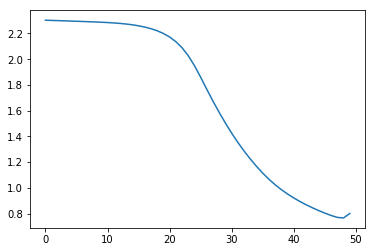

In [130]:
plt.plot(NN.L)

### バッチありクラス

In [224]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self, n_nodes1, n_nodes2, n_nodes3, itr=1000, verbose=True, alpha=0.00001, sigma=0.01, b_size=20):
        self.verbose = verbose
        self.itr = itr
        self.alpha = alpha
        self.sigma = sigma
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_nodes3 = n_nodes3
        self.b_size = b_size
        self.L = []
        
        pass

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        #初期化
        n_features = X.shape[1]
        W1 = sigma * np.random.randn(n_features, self.n_nodes1) 
        W2 = sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        W3 = sigma * np.random.randn(self.n_nodes2, self.n_nodes3)
        B1 = sigma * np.random.randn(1, self.n_nodes1) 
        B2 = sigma * np.random.randn(1, self.n_nodes2) 
        B3 = sigma * np.random.randn(1, self.n_nodes3) 
        Z3 = np.zeros((self.b_size, self.n_nodes3), dtype=float)
        LB3 = np.zeros((self.n_nodes3,),dtype=float)
        LB2 = np.zeros((self.n_nodes2,),dtype=float)
        LB1 = np.zeros((self.n_nodes1,),dtype=float)
        
        #ミニバッチ
        
        itr_count = 0
        for _ in range(self.itr):
            if itr_count%10==0:
                print(itr_count,">", end="")
            Lbatch = np.array([])
            
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.b_size)
            for mini_X_train, mini_y_train in get_mini_batch:
            
                #１層目
                XW1 = np.dot(mini_X_train, W1)
                A1 = XW1+B1
                Z1 = np.tanh(A1)                                                 #ハイパボリックタンジェント関数

                #２層目
                XW2 = np.dot(Z1, W2)
                A2 = XW2+B2
                Z2 = np.tanh(A2)                                                 #ハイパボリックタンジェント関数

                #３層目
                XW3 = np.dot(Z2, W3)
                A3 = XW3+B3
                for i in range(self.b_size):
                        Z3[i] = np.exp(A3[i]) / np.exp(A3[i]).sum()   #ソフトマックス関数

                """バックプロパゲーション
                """
                #３層目
                LA3 = Z3 - mini_y_train
                LB3 = np.sum(LA3, axis=0)
                LW3 = np.dot(Z2.T, LA3)
                LZ2 = np.dot(LA3, W3.T)

                #２層目
                LA2 = LZ2 * (1-np.tanh(A2)**2) 
                LB2 = np.sum(LA2, axis=0)
                LW2 = np.dot(Z1.T, LA2)
                LZ1 = np.dot(LA2, W2.T)

                #１層目
                LA1 = LZ1 * (1- np.tanh(A1)**2)
                LB1 = np.sum(LA1, axis=0)
                LW1 = np.dot(mini_X_train.T, LA1)

                """更新式
                """
                W1 = W1 - self.alpha*LW1
                W2 = W2 - self.alpha*LW2
                W3 = W3 - self.alpha*LW3
                B1 = B1 - self.alpha*LB1
                B2 = B2 - self.alpha*LB2
                B3 = B3 - self.alpha*LB3

                Ltmp = 0
                for i in range(self.b_size):
                    Ltmp += np.sum(mini_y_train[i] * np.log(Z3[i]))
                Lbatch = np.append(Lbatch, (Ltmp/ self.b_size) * -1)
                #print("L:", self.L[-1])
                
            self.L.append(Lbatch.mean())    
            itr_count += 1
            
        self.w1 = W1
        self.w2 = W2
        self.w3 = W3
        self.b1 = B1
        self.b2 = B2
        self.b3 = B3
        self.z3 = Z3

        
        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass

    def predict(self, Xt):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        Z3 = np.zeros((Xt.shape[0], self.n_nodes3), dtype=float)
        
        #１層目
        XW1 = np.dot(Xt, self.w1)
        A1 = XW1+ self.b1
        Z1 = np.tanh(A1)

        #２層目
        XW2 = np.dot(Z1, self.w2)
        A2 = XW2 + self.b2
        Z2 = np.tanh(A2)

        #３層目
        XW3 = np.dot(Z2, self.w3)
        A3 = XW3 + self.b3
        for i in range(Xt.shape[0]):
                Z3[i] = np.exp(A3[i]) / np.exp(A3[i]).sum()   #ソフトマックス関数
        
        return Z3

#### クラスのデバッグ

In [158]:
NN = ScratchSimpleNeuralNetrowkClassifier(n_nodes1=400, n_nodes2=200, n_nodes3=10)

NN.fit(Xt_train, yt_train)

0 >100 >200 >300 >400 >500 >600 >700 >800 >900 >1000 >1100 >1200 >1300 >1400 >1500 >1600 >1700 >1800 >1900 >2000 >2100 >2200 >2300 >


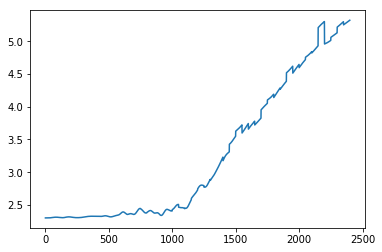

In [139]:
#itr=50 batchsize=1000
plt.plot(NN.L)

In [140]:
print(NN.L[0:20])

[2.302609159548342, 2.302609105492969, 2.302608092215036, 2.3026061833465397, 2.3026034736163083, 2.302600088390919, 2.3025961830705977, 2.3025919423423056, 2.302587579292658, 2.302583334383883, 2.3025794742964725, 2.3025762906425893, 2.3025740985550245, 2.3025732351565904, 2.3025740579156433, 2.302576942893597, 2.302582282890899, 2.3025904854983104, 2.302601971060603, 2.3026171705603655]


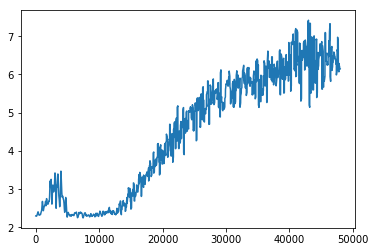

In [153]:
#itr=100 batchsize=100
plt.plot(NN.L)

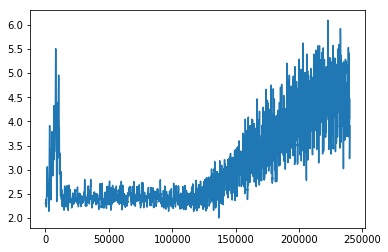

In [156]:
#itr=100 batchsize=20
plt.plot(NN.L)

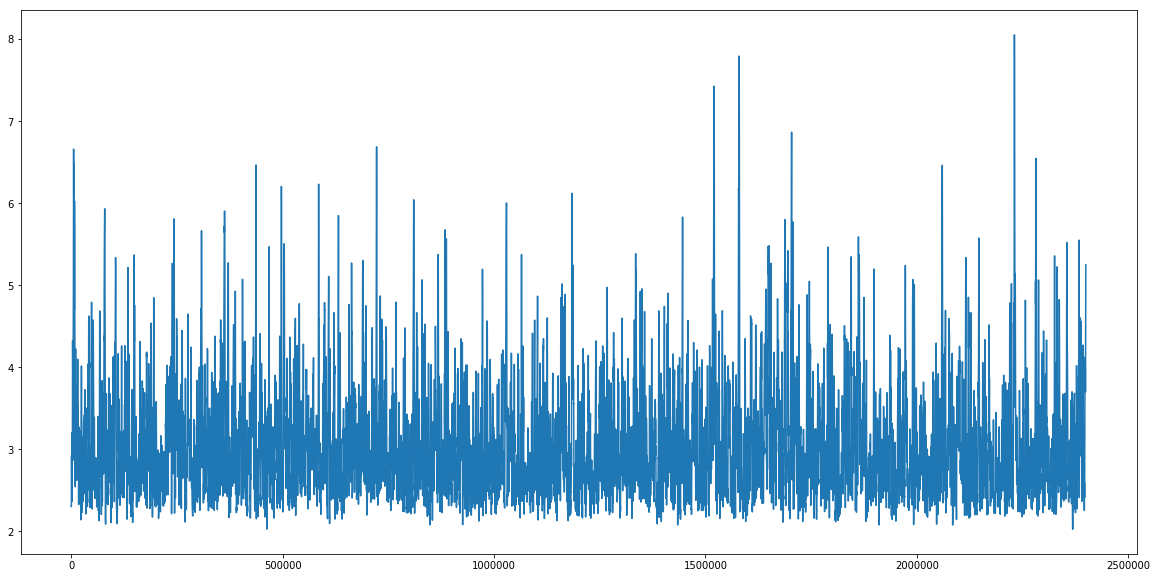

In [161]:
#itr=1000 batchsize=20
plt.figure(figsize=(20,10))
plt.plot(NN.L)

In [167]:
NN2 = ScratchSimpleNeuralNetrowkClassifier(
    n_nodes1=400, n_nodes2=200, n_nodes3=10, itr=50, b_size=20, alpha=0.0000001)

NN2.fit(Xt_train, yt_train)

0 >100 >200 >300 >400 >500 >600 >700 >800 >900 >1000 >1100 >1200 >1300 >1400 >1500 >1600 >1700 >1800 >1900 >2000 >2100 >2200 >2300 >


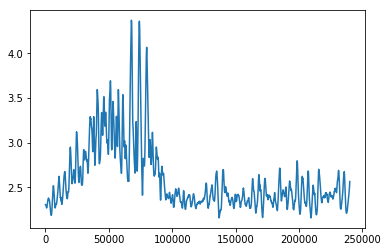

In [164]:
plt.plot(NN2.L)

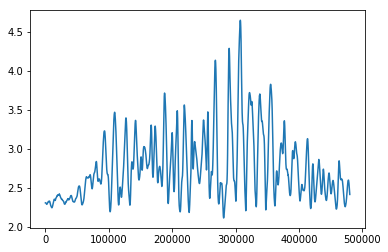

In [166]:
#itr=200, b_size=20, alpha=0.0000001
plt.plot(NN2.L)

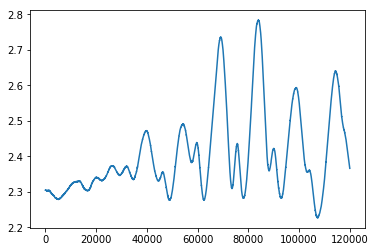

In [168]:
#itr=50, b_size=20, alpha=0.0000001
plt.plot(NN2.L)

In [172]:
NN3 = ScratchSimpleNeuralNetrowkClassifier(
    n_nodes1=400, n_nodes2=200, n_nodes3=10, itr=100, b_size=48000, alpha=0.0000001)

NN3.fit(Xt_train, yt_train)

0 >


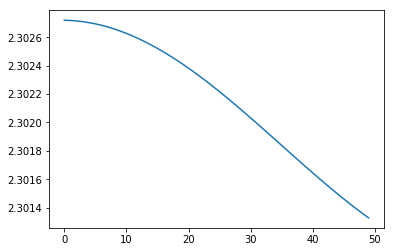

In [171]:
#itr=50
plt.plot(NN3.L)

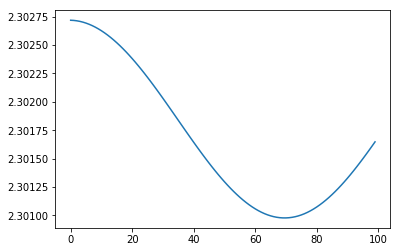

In [173]:
#itr=100
plt.plot(NN3.L)

0 >10 >20 >30 >40 >


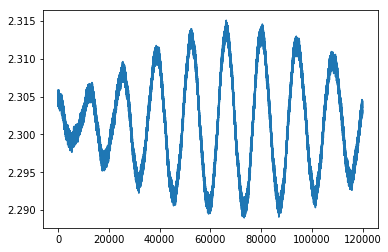

In [175]:
NN4 = ScratchSimpleNeuralNetrowkClassifier(
    n_nodes1=400, n_nodes2=200, n_nodes3=10, itr=50, b_size=20, alpha=0.0000001)

NN4.fit(Xt_train, yt_train)
plt.plot(NN4.L)

#### ようやく収束

収束しなかった原因
- 学習率が高かった
- 損失関数のYラベルをバッチのYラベルと別のものを参照していた

0 >10 >20 >


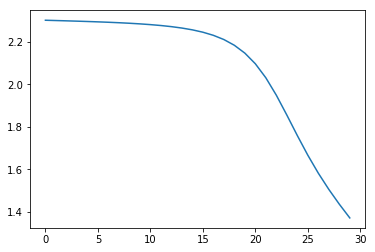

In [192]:
NN5 = ScratchSimpleNeuralNetrowkClassifier(
    n_nodes1=400, n_nodes2=200, n_nodes3=10, itr=30, b_size=20, alpha=0.00001)

NN5.fit(Xt_train, yt_train)
plt.plot(NN5.L)

## 【問題６】学習と推定

0 >10 >20 >30 >40 >50 >


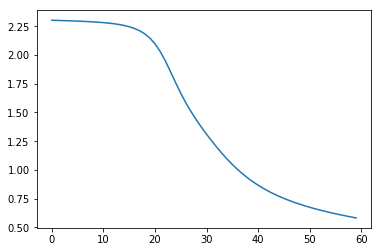

In [225]:
NN5 = ScratchSimpleNeuralNetrowkClassifier(
    n_nodes1=400, n_nodes2=200, n_nodes3=10, itr=60, b_size=20, alpha=0.00001)

NN5.fit(Xt_train, yt_train)
plt.plot(NN5.L)

In [226]:
print(Xt_val.shape)
y_pred_raw = NN5.predict(Xt_val)
print(y_pred_raw.shape)
print(y_pred_raw[0:5])
print(np.argmax(y_pred_raw[0]))

(12000, 784)
(12000, 10)
[[4.82904502e-02 7.16857940e-06 5.87616635e-05 1.20024512e-01
  1.46808730e-04 7.81515167e-01 1.55096268e-05 1.14826096e-04
  4.84227017e-02 1.40409465e-03]
 [2.95700049e-05 5.32289684e-04 4.43512762e-05 9.15388201e-05
  9.75539728e-02 3.65258991e-04 8.05255145e-05 4.24312114e-01
  2.14902476e-03 4.74841354e-01]
 [7.63753010e-06 2.05930434e-01 5.82474623e-04 3.42495913e-02
  2.32018819e-03 1.48444153e-03 1.55629428e-05 6.15917425e-01
  2.59131574e-02 1.13579087e-01]
 [3.80208223e-04 7.03156075e-05 5.01768974e-05 1.25725970e-03
  1.25534843e-01 2.37753694e-02 8.78924340e-05 4.64689770e-02
  5.88515024e-02 7.43523455e-01]
 [2.27681450e-04 4.15190684e-02 4.04544229e-03 7.82103807e-03
  3.20188569e-02 2.36145219e-03 4.70870790e-04 6.82670730e-01
  2.06979251e-02 2.08166935e-01]]
5


In [227]:
y_pred = np.array([])
for i in y_pred_raw:
    y_pred = np.append(y_pred, np.argmax(i))

print(y_pred.shape)
print(y_pred[0:5])

(12000,)
[5. 9. 7. 9. 7.]


In [228]:
yt_val_ = np.array([])
for i in yt_val:
    yt_val_ = np.append(yt_val_, np.argmax(i))
print(yt_val_.shape)
metrics.accuracy_score(yt_val_, y_pred)

(12000,)


0.8309166666666666